#Importando as bibliotecas necessárias:

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.datasets import make_blobs
from scipy.cluster.hierarchy import dendrogram,linkage

#Carregando e preparando o conjunto de dados:

In [ ]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

colunas = ['comprimento_sepala', 'largura_sepala', 'comprimento_petala', 'largura_petala', 'classe']

iris_df = pd.read_csv(url, names=colunas)


#Primeiramente separando as features e os rótulos e depois normalizando os dados

In [ ]:
# Separar os dados de entrada (características) das variáveis de saída (rótulos de classe)

# Variáveis de entrada (características): removendo a coluna 'classe' do DataFrame e atribuindo o resultado a X
X = iris_df.drop('classe', axis=1)
# Variáveis de saída (rótulos de classe): selecionando apenas a coluna 'classe' do DataFrame e atribuindo o resultado a Y
Y = iris_df['classe']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Aplicando o Elbow Method para escolher o número ideal de clusters para o KMeans

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

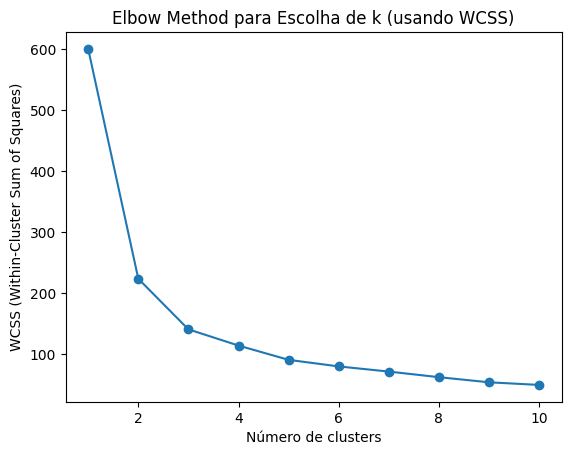

In [ ]:
# Calcular o WCSS para diferentes valores de k
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42) # Usar 42 é convenção comum
    kmeans.fit(X_scaled) #Treinar o modelo padronizado e encontra os centroides dos clusters que melhor representam os dados fornecidos
    wcss.append(kmeans.inertia_)  # Retorna a soma dos quadrados das distâncias dos pontos ao centróide de seu cluster (WCSS)

# Plotar o Elbow Method com WCSS
plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel('Número de clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.title('Elbow Method para Escolha de k (usando WCSS)')
plt.show()


#Aplicando o algoritmo de KMeans e plotando gráfico

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


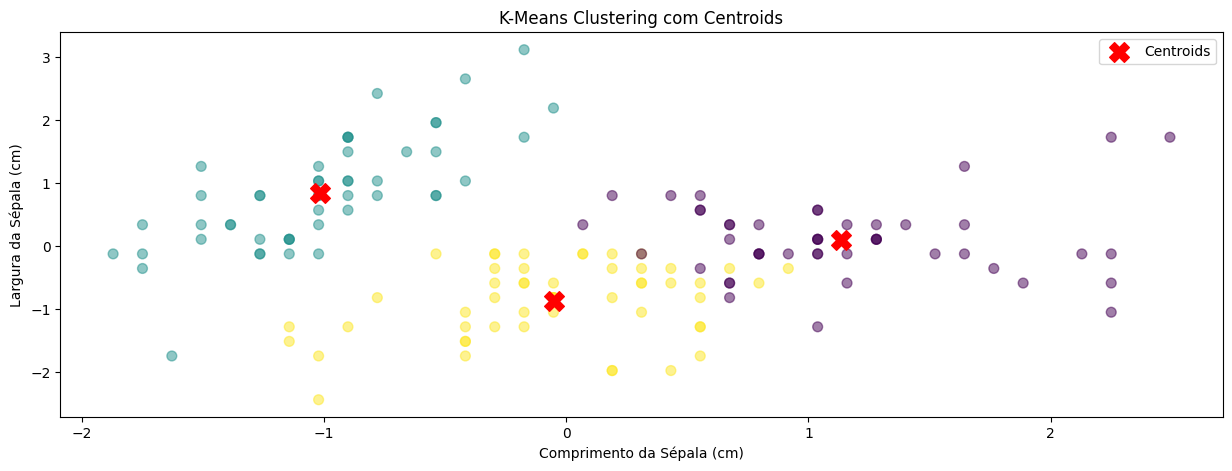

In [ ]:
# Aplicando o K-Means
k = 3  # Número de clusters desejado
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X_scaled)
centroides = kmeans.cluster_centers_

# Adicionar os centroides ao conjunto de dados
iris_df['kmeans_cluster'] = kmeans.labels_

# Plotar os clusters e os centroides
plt.figure(figsize=(15, 5))

# Plotar os pontos de dados
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans.labels_, cmap='viridis', s=50, alpha=0.5)# c ->cor dos pontos no gráfico/viridis ->mapa de cores a ser usado para mapear os rótulos/s -> tamanho dos pontos/alpha ->transparência dos pontos

# Plotar os centroides
plt.scatter(centroides[:, 0], centroides[:, 1], c='red', s=200, marker='X', label='Centroids')

plt.xlabel('Comprimento da Sépala (cm)')
plt.ylabel('Largura da Sépala (cm)')
plt.title('K-Means Clustering com Centroids')
plt.legend()
plt.show()


# Aplicando o algoritmo Hierárquico e plotando o Dendrograma

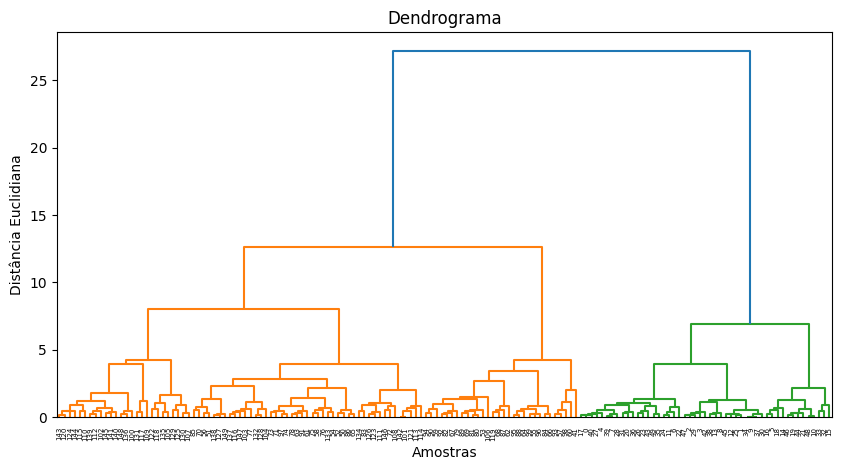

In [ ]:
# Aplicar o algoritmo Hierárquico
agglomerative = AgglomerativeClustering(n_clusters=k)
agglomerative.fit(X_scaled)

# Adicionar os clusters ao conjunto de dados
iris_df['hierarchical_cluster'] = agglomerative.labels_

# Plotar o dendrograma
linked = linkage(X_scaled, method='ward')
plt.figure(figsize=(10, 5))
dendrogram(linked,
           orientation='top',#desenhado de cima para baixo
           labels=iris_df.index,  # Utilizando os índices do DataFrame como rótulos
           distance_sort='descending',#indica que os ramos serão ordenados em ordem decrescente de distância entre os clusters
           show_leaf_counts=True) #número de amostras em cada folha do dendrograma será exibido
plt.title('Dendrograma')
plt.xlabel('Amostras')
plt.ylabel('Distância Euclidiana')
plt.show()


#Aplicando o algoritmo DBSCAN e plotando gráfico

In [ ]:
# Aplicando do DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(X_scaled)

# Adicionar os clusters ao conjunto de dados
iris_df['dbscan_cluster'] = dbscan.labels_

# Plotar o gráfico
fig = px.scatter(iris_df, x='comprimento_sepala', y='largura_sepala',color='dbscan_cluster', opacity=0.7,title='Clusters DBSCAN')
fig.show()


#Outro método para descobrir qual método é mais eficiente

vai ser o que mais se aproximar de 1 ou seja o K-Means

In [ ]:
from sklearn.metrics import silhouette_score

# Calcular o coeficiente de silhueta para cada algoritmo
kmeans_silhouette = silhouette_score(X_scaled, kmeans.labels_)
agg_silhouette = silhouette_score(X_scaled, agglomerative.labels_)
dbscan_silhouette = silhouette_score(X_scaled, dbscan.labels_)

# Exibir os resultados
print("Coeficiente de Silhueta:")
print(f"K-Means: {kmeans_silhouette}")
print(f"Hierárquico: {agg_silhouette}")
print(f"DBSCAN: {dbscan_silhouette}")


Coeficiente de Silhueta:
K-Means: 0.4589717867018717
Hierárquico: 0.44553956399200406
DBSCAN: 0.3491981656526392


#Plot de todos algoritmos

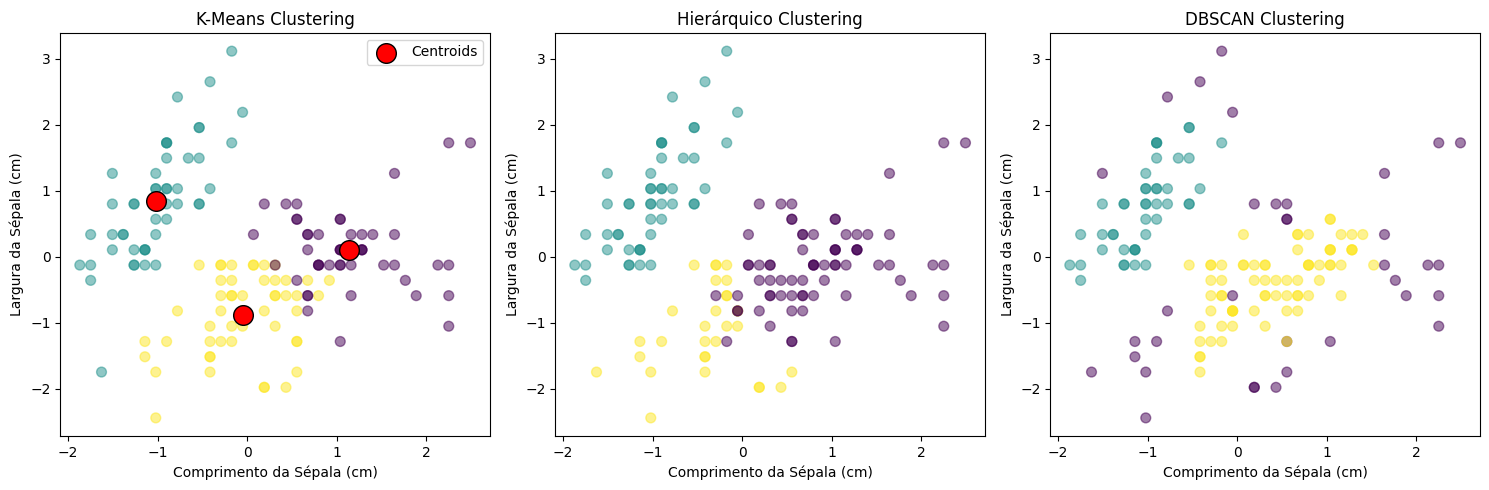

In [ ]:
plt.figure(figsize=(15, 5))

# K-Means
plt.subplot(1, 3, 1)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans.labels_, cmap='viridis', s=50, alpha=0.5)
plt.scatter(centroides[:, 0], centroides[:, 1], c='red', s=200, marker='o', edgecolors='k', label='Centroids')
plt.xlabel('Comprimento da Sépala (cm)')
plt.ylabel('Largura da Sépala (cm)')
plt.title('K-Means Clustering')
plt.legend()

# Hierárquico
plt.subplot(1, 3, 2)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=iris_df['hierarchical_cluster'], cmap='viridis', s=50, alpha=0.5)
plt.xlabel('Comprimento da Sépala (cm)')
plt.ylabel('Largura da Sépala (cm)')
plt.title('Hierárquico Clustering')

# DBSCAN
plt.subplot(1, 3, 3)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=dbscan.labels_, cmap='viridis', s=50, alpha=0.5)
plt.xlabel('Comprimento da Sépala (cm)')
plt.ylabel('Largura da Sépala (cm)')
plt.title('DBSCAN Clustering')

plt.tight_layout()
plt.show()


# **K-Means**

O K-Means é um método de clustering particional, onde os dados são agrupados em um número pré-definido de clusters.

O algoritmo procura minimizar a soma dos quadrados das distâncias entre os pontos de dados e os centroides dos clusters.

O K-Means assume que os clusters são esféricos e de tamanho aproximadamente igual.

É rápido e eficiente para grandes conjuntos de dados.

Ideal para quando o número de clusters já existe.

# **Hierárquico**

O clustering hierárquico cria uma hierarquia de clusters, onde os clusters podem ser aninhados uns dentro dos outros.

Não requer o número de clusters como entrada, resultando em uma representação hierárquica dos dados.

**aglomerativo** (começando com cada ponto como um cluster e mesclando clusters semelhantes)

**divisivo** (começando com todos os pontos em um cluster e dividindo-os em subclusters).

É útil para entender a estrutura hierárquica dos dados e pode ser visualizado facilmente usando um dendrograma.

# **DBSCAN**

O DBSCAN é um algoritmo de clustering baseado em densidade, que agrupa pontos próximos uns aos outros em regiões densas separadas por regiões de baixa densidade.

Não requer o número de clusters como entrada, mas depende de dois parâmetros:

1-eps(a distância máxima entre dois pontos para serem considerados vizinhos)

2-min_samples(o número mínimo de pontos em uma região para formar um cluster).

É capaz de identificar clusters de formas arbitrárias e é robusto a ruídos e outliers.

Útil quando os clusters têm densidades diferentes ou quando os dados estão espalhados de forma irregular.

## **Escolha do Melhor Método:**

No caso do conjunto de dados Iris, o K-Means pode ser uma escolha adequada, pois os clusters podem ser aproximadamente esféricos (especialmente se considerarmos apenas duas dimensões) e o número de clusters é conhecido a priori (três espécies de flores). Além disso, o K-Means é computacionalmente eficiente e fácil de interpretar.

O DBSCAN também pode ser uma boa opção, especialmente se houver ruído nos dados ou se os clusters tiverem densidades diferentes. No entanto, pode ser mais desafiador escolher os parâmetros adequados para o DBSCAN, como o eps e min_samples.

O clustering hierárquico pode ser útil para explorar a estrutura hierárquica dos dados e entender como os clusters se relacionam uns com os outros em diferentes níveis de granularidade.